# Module 04: Unsupervised Learning (Assignment 1-B)

In this assignment, we are supposed to perform basic EDA on Online Retail dataset and apply the K-Means and Mean Shift algorithms to identify the different clusters present in the data.

In [1]:
# importing relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Loading Dataset

In [2]:
# reading the dataset in python notebook

df=pd.read_csv('Online_Retail.csv', encoding="ISO-8859–1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-11 12:50,4.15,12680.0,France


### 2. Descriptive Statistics

In [3]:
# shape of the data

df.shape

(541909, 8)

In [4]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


### 3. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# change the invoice_date format - String to Timestamp format

df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate)

In [7]:
df['Description'] = df.Description.str.lower()

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
# Looking for missing values

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# dropping missing values

df1 = df.dropna()

In [11]:
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [13]:
# change customer ID format - Float to Int type

df1['CustomerID'] = df1['CustomerID'].astype('int64')

<ipython-input-13-b6216fbd9596>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CustomerID'] = df1['CustomerID'].astype('int64')


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [15]:
df1.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,406829,406829,406829,406829.000000,406829,406829.000000,406829.000000,406829
unique,22190,3684,3896,NaN,20460,NaN,NaN,37
top,576339,85123A,white hanging heart t-light holder,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom
freq,542,2077,2070,NaN,543,NaN,NaN,361878
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.061303,NaN,3.460471,15287.690570,NaN
std,NaN,NaN,NaN,248.693370,NaN,69.315162,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13953.000000,NaN


Quantity column has negative values which is not practically possible. 

In [16]:
# Removing negative quatities from dataset
df1 = df1[df1.Quantity > 0]

In [17]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [18]:
df1.nunique()

InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
dtype: int64

In [19]:
df1.duplicated().sum()

5192

In [20]:
#creating amount spent column from quantity and unitprice column
df1['AmountSpent'] = df1['Quantity'] * df1['UnitPrice']

# creating year, month, day and hour columns from Invoice Date
df1['year_month'] = df1['InvoiceDate'].map(lambda x: 100*x.year + x.month) 
df1['year'] = df1['InvoiceDate'].dt.year
df1['month'] = df1['InvoiceDate'].dt.month
df1['day'] = df1['InvoiceDate'].dt.dayofweek
df1['hour'] = df1['InvoiceDate'].dt.hour

In [21]:
# rearranging all columns for better reference

df1 = df1[['CustomerID','InvoiceNo','InvoiceDate','year_month','year','month','day','hour','StockCode',
                 'Description','Quantity','UnitPrice','AmountSpent','Country']]

In [22]:
df1.head()

,CustomerID,InvoiceNo,InvoiceDate,year_month,year,month,day,hour,StockCode,Description,Quantity,UnitPrice,AmountSpent,Country
0,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,85123A,white hanging heart t-light holder,6,2.55,15.30,United Kingdom
1,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,71053,white metal lantern,6,3.39,20.34,United Kingdom
2,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,United Kingdom
3,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,United Kingdom
4,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,84029E,red woolly hottie white heart.,6,3.39,20.34,United Kingdom


### 4. Data Visualisation

#### - Analyzing data based on countries

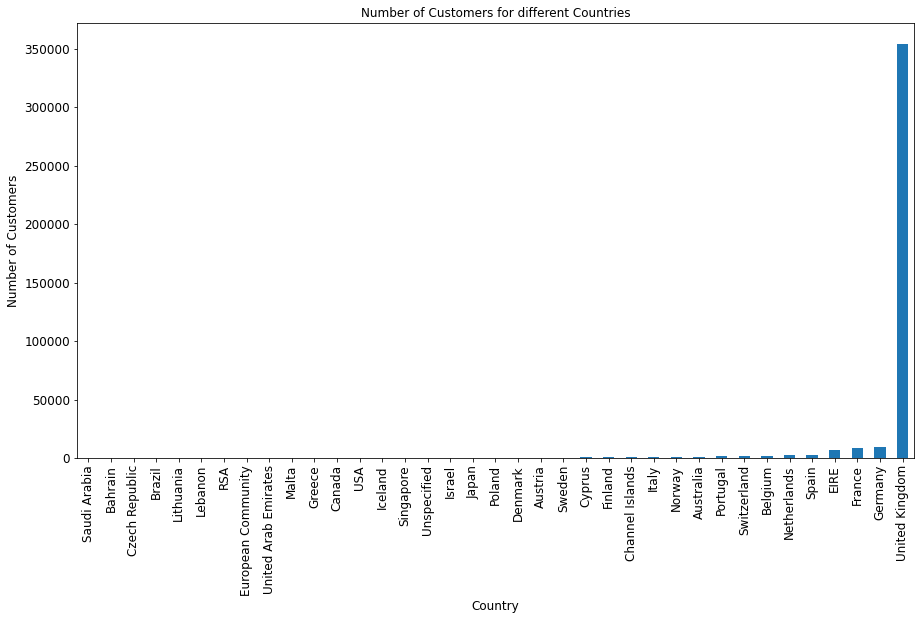

In [23]:
# Countries vs No. of customers

country_customers = df1.groupby('Country')['CustomerID'].count().sort_values()

# plot number of unique customers in each country
plt.subplots(figsize=(15,8))
country_customers.plot(kind='bar', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Number of Customers for different Countries', fontsize=12)
plt.show()

- The plot above shows number of customers in different countries. It can be observed that the number of customers in United Kingdom is significantly higher than other countries.
- Due to very high number of customers in United Kingdom, the plot can not display results properly for other countries, so I will plot the same graph excluding United Kingdom

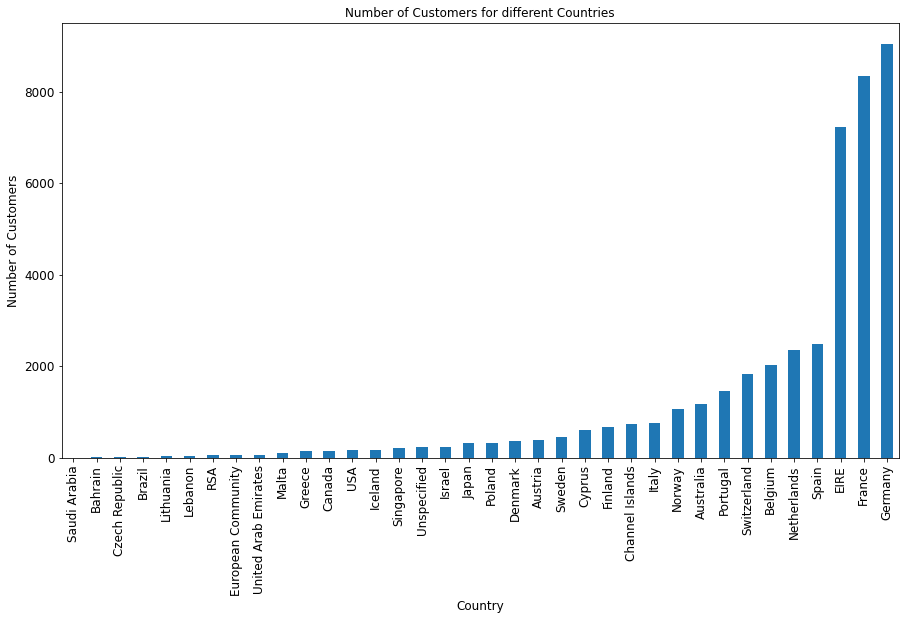

In [24]:
# Countries vs No. of customers
country_customers = df1.groupby('Country')['CustomerID'].count().sort_values()
del country_customers['United Kingdom']

# plot number of unique customers in each country
plt.subplots(figsize=(15,8))
country_customers.plot(kind='bar', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Number of Customers for different Countries', fontsize=12)
plt.show()

- The plot above shows number of customers in different countries excluding United Kingdom.
- After United Kingdom, Germany has the highest number of customers.
- It can be observed that, European countries has more customers than other countries.
- Saudi Arabia has least number of customers.

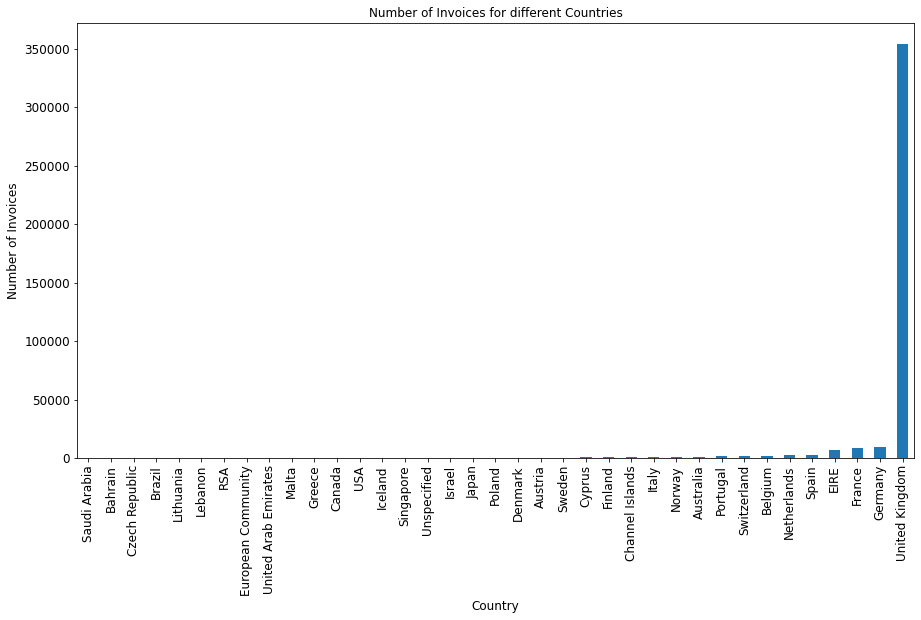

In [25]:
# Countries vs No. of invoices
country_invoice = df1.groupby('Country')['InvoiceNo'].count().sort_values()

# plot number of unique customers in each country
plt.subplots(figsize=(15,8))
country_invoice.plot(kind='bar', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Invoices', fontsize=12)
plt.title('Number of Invoices for different Countries', fontsize=12)
plt.show()

- The plot above shows number of invoices in different countries. United Kingdom has highest number of invoices.
- Same graph will be plotted excluding United Kingdom to display better results for all countries.

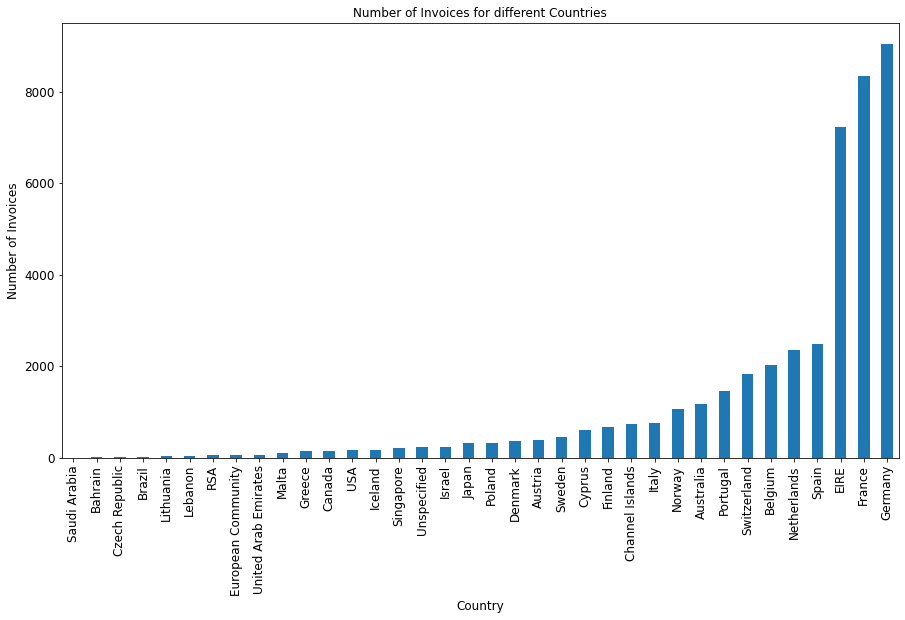

In [26]:
# Countries vs No. of customers
country_invoice = df1.groupby('Country')['InvoiceNo'].count().sort_values()
del country_invoice['United Kingdom']

# plot number of unique customers in each country
plt.subplots(figsize=(15,8))
country_invoice.plot(kind='bar', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Invoices', fontsize=12)
plt.title('Number of Invoices for different Countries', fontsize=12)
plt.show()

- Results are observed similar to number of customers, Germany having the second highest number of invoices and Saudi Arabia having least number of invoices.

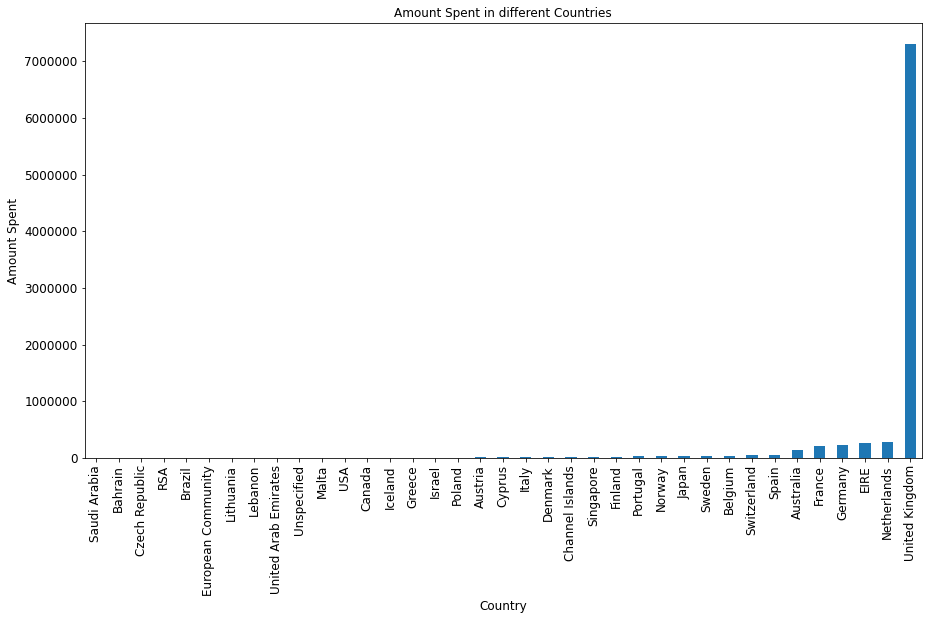

In [27]:
# Countries vs Amount Spent
country_amountspent = df1.groupby('Country')['AmountSpent'].sum().sort_values()

# plot number of unique customers in each country
plt.subplots(figsize=(15,8))
ax = country_amountspent.plot(kind='bar', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Amount Spent', fontsize=12)
plt.title('Amount Spent in different Countries', fontsize=12)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

- The plot above shows total amount of money spent indifferent countries. Customers in United Kingdom has spent the highest amount of money in transactions.
- Similar graph will be plotted excluding United Kingdom to display better results for all countries.

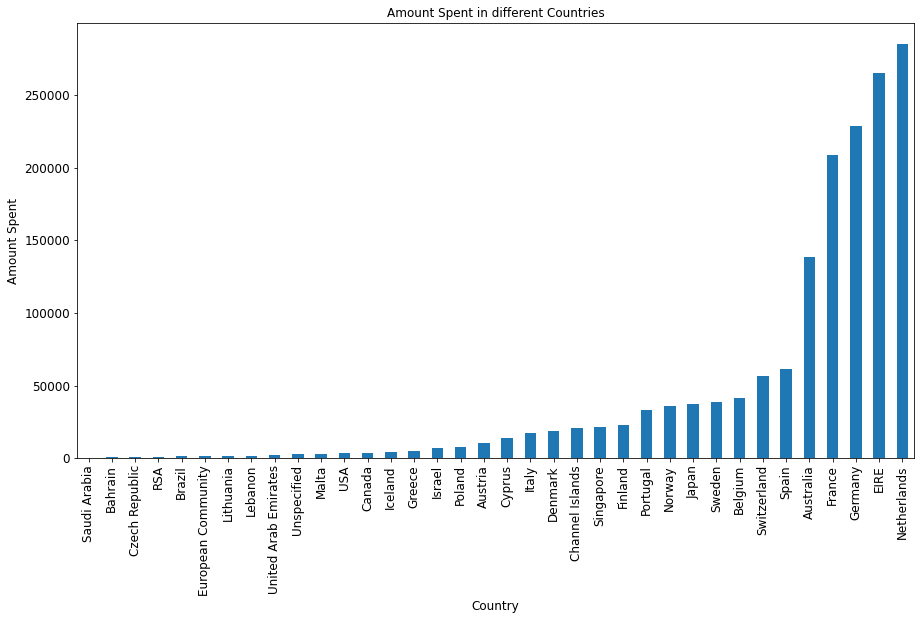

In [28]:
# Countries vs Amount Spent
country_amountspent = df1.groupby('Country')['AmountSpent'].sum().sort_values()
del country_amountspent['United Kingdom']

# plot number of unique customers in each country
plt.subplots(figsize=(15,8))
ax = country_amountspent.plot(kind='bar', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Amount Spent', fontsize=12)
plt.title('Amount Spent in different Countries', fontsize=12)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

- Customers in Netherlands has spend highest amount after United Kingdom, in transactions.
- Customers in Saudi Arabia and Bahrain has spent least amount.

#### - Analyzing data based on customers

In [29]:
dfx = df1.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
dfx.head()

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


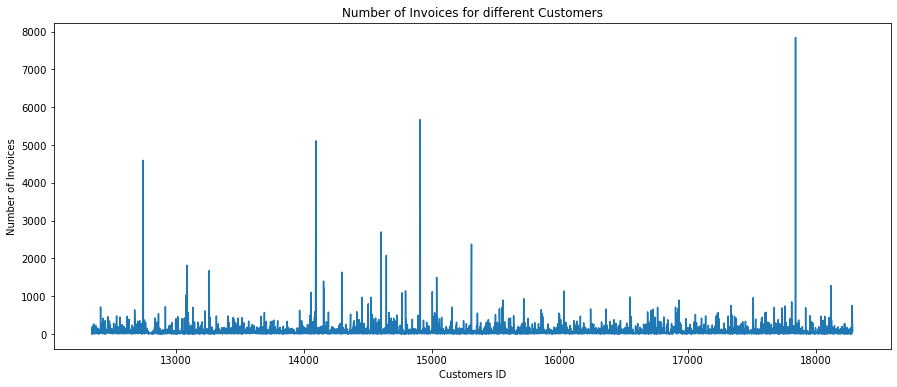

In [30]:
# No. of customers vs no. of invoices
plt.subplots(figsize=(15,6))
plt.plot(dfx.CustomerID, dfx.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Invoices')
plt.title('Number of Invoices for different Customers')
plt.show()

In [31]:
dfx.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


- The table above shows top 5 customers with most number of orders

In [32]:
dfy = df1.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum()
dfy.head()

,CustomerID,Country,AmountSpent
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40


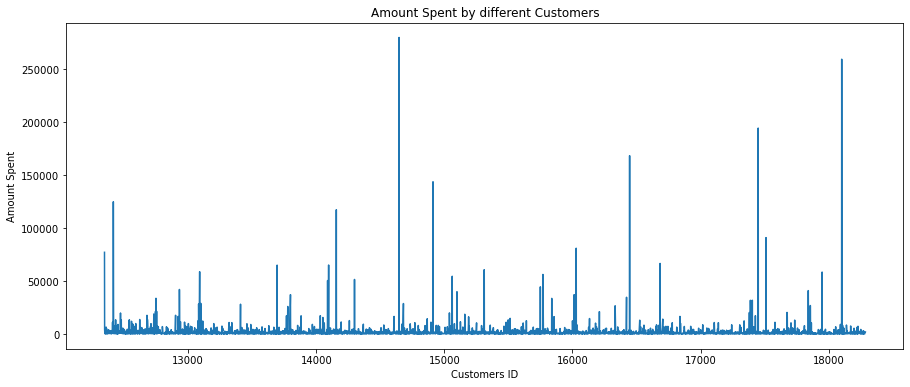

In [33]:
# No. of customers vs no. of invoices
plt.subplots(figsize=(15,6))
plt.plot(dfy.CustomerID, dfy.AmountSpent)
plt.xlabel('Customers ID')
plt.ylabel('Amount Spent')
plt.title('Amount Spent by different Customers')
plt.show()

In [34]:
dfy.sort_values(by='AmountSpent', ascending=False).head()

,CustomerID,Country,AmountSpent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


The table shows top 5 customers who has spent highest amount.

In [35]:
dfy.sort_values(by='AmountSpent', ascending=True).head()

,CustomerID,Country,AmountSpent
693,13256,United Kingdom,0.00
3226,16738,United Kingdom,3.75
1802,14792,United Kingdom,6.20
3023,16454,United Kingdom,6.90
4107,17956,United Kingdom,12.75


The table shows top 5 customers who has spent least amount.

#### - Analyzing data based on number of invoices

In [36]:
df1.describe()

,CustomerID,year_month,year,month,day,hour,Quantity,UnitPrice,AmountSpent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,15294.315171,201101.038417,2010.934259,7.612537,2.614555,12.728247,13.021823,3.116174,22.394749
std,1713.169877,23.836517,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,309.055588
min,12346.000000,201012.000000,2010.000000,1.000000,0.000000,6.000000,1.000000,0.000000,0.000000
25%,13969.000000,201104.000000,2011.000000,5.000000,1.000000,11.000000,2.000000,1.250000,4.680000
50%,15159.000000,201107.000000,2011.000000,8.000000,2.000000,13.000000,6.000000,1.950000,11.800000
75%,16795.000000,201110.000000,2011.000000,11.000000,4.000000,14.000000,12.000000,3.750000,19.800000
max,18287.000000,201112.000000,2011.000000,12.000000,6.000000,20.000000,80995.000000,8142.750000,168469.600000


In [37]:
df1.head()

,CustomerID,InvoiceNo,InvoiceDate,year_month,year,month,day,hour,StockCode,Description,Quantity,UnitPrice,AmountSpent,Country
0,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,85123A,white hanging heart t-light holder,6,2.55,15.30,United Kingdom
1,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,71053,white metal lantern,6,3.39,20.34,United Kingdom
2,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,United Kingdom
3,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,United Kingdom
4,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,84029E,red woolly hottie white heart.,6,3.39,20.34,United Kingdom


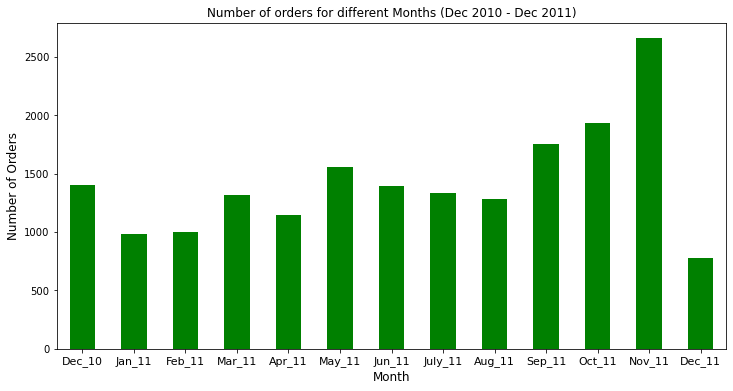

In [38]:
# No. of invoices vs Date & Time
dfz = df1.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index()
ax = dfz.plot(kind='bar', color='green',figsize=(12,6))
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Number of Orders',fontsize=12)
ax.set_title('Number of orders for different Months (Dec 2010 - Dec 2011)',fontsize=12)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11',
                    'Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=11)
plt.show()

- The plot above shows number of orders in different months from Dec 2010 to Dec 2011
- There were highest number of orders in Nov 2011 and least number of orders in Dec 2011.

In [39]:
df_day = df1.groupby('InvoiceNo')['day'].unique().value_counts().sort_index()
df_day

[0]    2863
[1]    3185
[2]    3455
[3]    4033
[4]    2831
[6]    2169
Name: day, dtype: int64

It is observed that no transactions are made on Saturday.

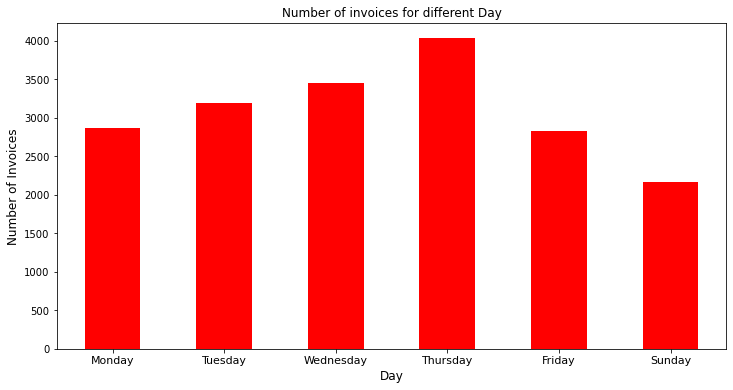

In [40]:
# No. of invoices vs days
ax = df_day.plot(kind='bar', color='red',figsize=(12,6))
ax.set_xlabel('Day',fontsize=12)
ax.set_ylabel('Number of Invoices',fontsize=12)
ax.set_title('Number of invoices for different Day',fontsize=12)
ax.set_xticklabels(('Monday','Tuesday','Wednesday','Thursday','Friday','Sunday'), rotation='horizontal', fontsize=11)
plt.show()

- The plot above shows number of invoices in different days.
- Most transactions are made on Thursdays and least transactions are made on Sundays.
- No transactions are made on Saturdays.

In [41]:
df_hour = df1.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index()
df_hour

[6]        1
[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: hour, dtype: int64

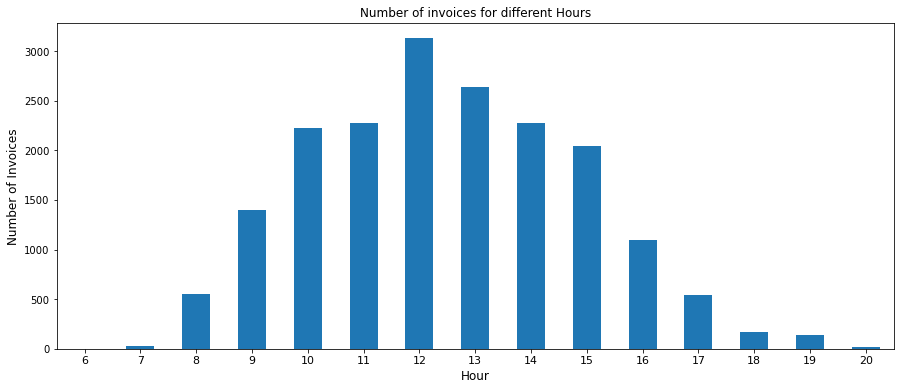

In [42]:
# No. of invoices vs hours
ax = df_hour.plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=12)
ax.set_ylabel('Number of Invoices',fontsize=12)
ax.set_title('Number of invoices for different Hours',fontsize=12)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=11)
plt.show()

- The plot above shows number of invoices in different hours
- It is observed that most transactions are made at noon.
- The plot follows a bell shape showing that number of transactions increases from 6 am till noon after which number of transactions decreases.
- The plot also shows the range of hours in which transactions are made, from 6am to 8pm.

##### - Analyzing data by unit price and amount spent

In [43]:
df1['UnitPrice'].describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

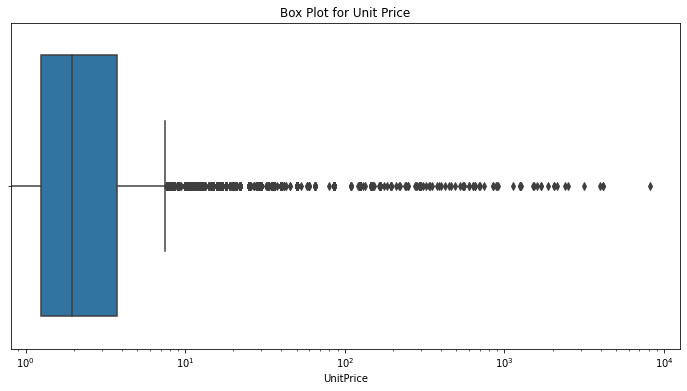

In [44]:
plt.subplots(figsize=(12,6))
ax = sns.boxplot(df1.UnitPrice)
ax.set_xscale("log")
ax.set_title('Box Plot for Unit Price',fontsize=12)
plt.show()

In [45]:
df1['AmountSpent'].describe()

count    397924.000000
mean         22.394749
std         309.055588
min           0.000000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: AmountSpent, dtype: float64

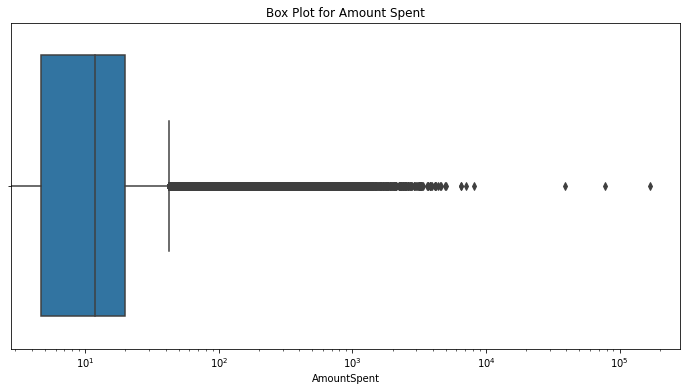

In [46]:
plt.subplots(figsize=(12,6))
ax = sns.boxplot(df1.AmountSpent)
ax.set_xscale("log")
ax.set_title('Box Plot for Amount Spent',fontsize=12)
plt.show()

From the plots above, it is observed that minimum unit price and amount price is 0. So the data can be divided into two sub data, data for free orders and data for paid orders.

In [47]:
# Data for free orders
df_free = df1[df1.AmountSpent == 0]
df_free.head()

,CustomerID,InvoiceNo,InvoiceDate,year_month,year,month,day,hour,StockCode,Description,Quantity,UnitPrice,AmountSpent,Country
9302,12647,537197,2010-12-05 14:02:00,201012,2010,12,6,14,22841,round cake tin vintage green,1,0.0,0.0,Germany
33576,16560,539263,2010-12-16 14:36:00,201012,2010,12,3,14,22580,advent calendar gingham sack,4,0.0,0.0,United Kingdom
40089,14911,539722,2010-12-21 13:45:00,201012,2010,12,1,13,22423,regency cakestand 3 tier,10,0.0,0.0,EIRE
47068,13081,540372,2011-01-06 16:41:00,201101,2011,1,3,16,22090,paper bunting retrospot,24,0.0,0.0,United Kingdom
47070,13081,540372,2011-01-06 16:41:00,201101,2011,1,3,16,22553,plasters in tin skulls,24,0.0,0.0,United Kingdom


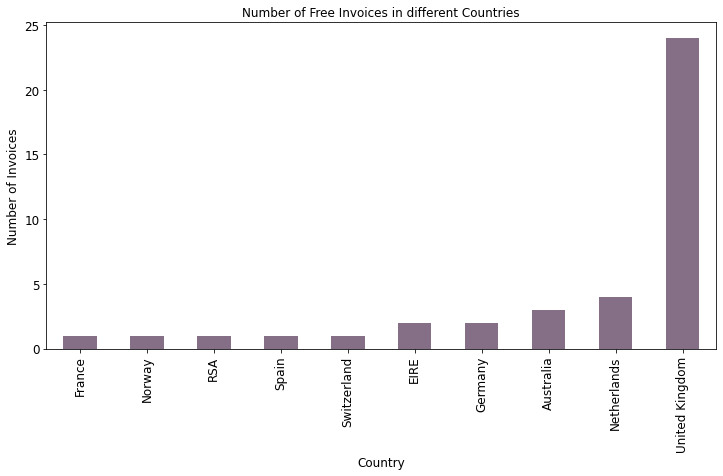

In [48]:
# Countries vs number of free orders
country_invoice1 = df_free.groupby('Country')['InvoiceNo'].count().sort_values()

# plot number of unique customers in each country
plt.subplots(figsize=(12,6))
country_invoice1.plot(kind='bar', fontsize=12, color='#846f87')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Invoices', fontsize=12)
plt.title('Number of Free Invoices in different Countries', fontsize=12)
plt.show()

- Plot above shows number of free orders in different countries.
- United Kingdom has highest number of free orders.
- It is also observed that European countries and Australia has free orders only.

In [49]:
# Data for paid orders
df_paid = df1[df1.AmountSpent != 0]
df_paid.head()

,CustomerID,InvoiceNo,InvoiceDate,year_month,year,month,day,hour,StockCode,Description,Quantity,UnitPrice,AmountSpent,Country
0,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,85123A,white hanging heart t-light holder,6,2.55,15.30,United Kingdom
1,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,71053,white metal lantern,6,3.39,20.34,United Kingdom
2,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,United Kingdom
3,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,United Kingdom
4,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,84029E,red woolly hottie white heart.,6,3.39,20.34,United Kingdom


In [50]:
df3=df_paid.year_month.value_counts().sort_index()

In [51]:
df_free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

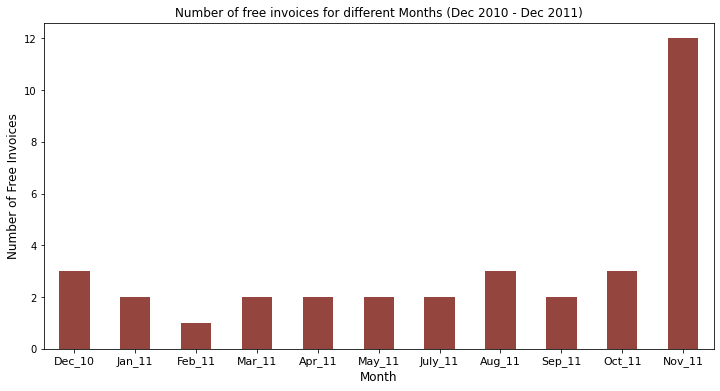

In [52]:
df2 = df_free.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index()

ax = df2.plot(kind='bar', color='#94453e',figsize=(12,6))
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Number of Free Invoices',fontsize=12)
ax.set_title('Number of free invoices for different Months (Dec 2010 - Dec 2011)',fontsize=12)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11',
                    'Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=11)
plt.show()

- The plot above shows number of free orders in different months from Dec 2010 to Nov 2011
- There are highest number of free orders in Nov 2011
- No free orders are observed in Jun 2011 and Dec 2011.

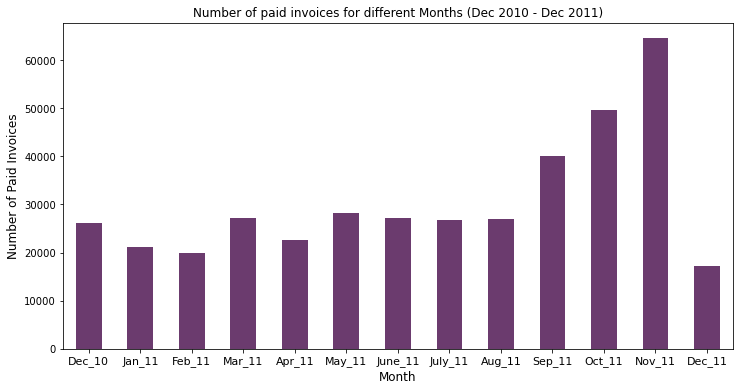

In [53]:
ax = df3.plot(kind='bar', color='#6b3b6e',figsize=(12,6))
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Number of Paid Invoices',fontsize=12)
ax.set_title('Number of paid invoices for different Months (Dec 2010 - Dec 2011)',fontsize=12)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','June_11','July_11',
                    'Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=11)
plt.show()

### 5. Data Preparation

The customers will be analysed on 3 factors;
- Number of transactions (Frequency)
- Number of days since last transaction (Recency)
- Total Amount of transactions (Monetary)

#### i) Monetary - Total amount of money spent by each customer (Quantity * Unit Price)

In [54]:
monetary = df_paid.groupby("CustomerID").AmountSpent.sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,AmountSpent
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


#### ii) Frequency - Total number of orders made by each customer

In [55]:
frequency = df_paid.groupby("CustomerID").InvoiceNo.count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17


#### iii) Recency - Number of days since recent transaction by each customer
Recency is calculated as difference between most recent invoice date and the invoice date of each customer.

In [56]:
max_date = max(df_paid.InvoiceDate)
max_date = max_date + pd.DateOffset(days = 1)

In [57]:
df_paid['Diff'] = max_date - df_paid['InvoiceDate']
df_paid.head()

<ipython-input-57-4f85a635ce0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paid['Diff'] = max_date - df_paid['InvoiceDate']


,CustomerID,InvoiceNo,InvoiceDate,year_month,year,month,day,hour,StockCode,Description,Quantity,UnitPrice,AmountSpent,Country,Diff
0,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,85123A,white hanging heart t-light holder,6,2.55,15.30,United Kingdom,374 days 04:24:00
1,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,71053,white metal lantern,6,3.39,20.34,United Kingdom,374 days 04:24:00
2,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,United Kingdom,374 days 04:24:00
3,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,United Kingdom,374 days 04:24:00
4,17850,536365,2010-12-01 08:26:00,201012,2010,12,2,8,84029E,red woolly hottie white heart.,6,3.39,20.34,United Kingdom,374 days 04:24:00


In [58]:
recency = df_paid.groupby('CustomerID')['Diff'].min()
recency = recency.reset_index()
recency.head()

,CustomerID,Diff
0,12346,326 days 02:49:00
1,12347,2 days 20:58:00
2,12348,75 days 23:37:00
3,12349,19 days 02:59:00
4,12350,310 days 20:49:00


In [59]:
# extracting day from invoice date
recency['Diff'] = recency['Diff'].dt.days
recency.head()

,CustomerID,Diff
0,12346,326
1,12347,2
2,12348,75
3,12349,19
4,12350,310


In [60]:
df_cluster = pd.DataFrame()
df_cluster['Recency'] = recency['Diff']
df_cluster['Frequency'] = frequency['InvoiceNo']
df_cluster['Monetary'] = monetary['AmountSpent']
df_cluster.head()

,Recency,Frequency,Monetary
0,326,1,77183.60
1,2,182,4310.00
2,75,31,1797.24
3,19,73,1757.55
4,310,17,334.40


#### Plotting graphs to find outliers and skewedness

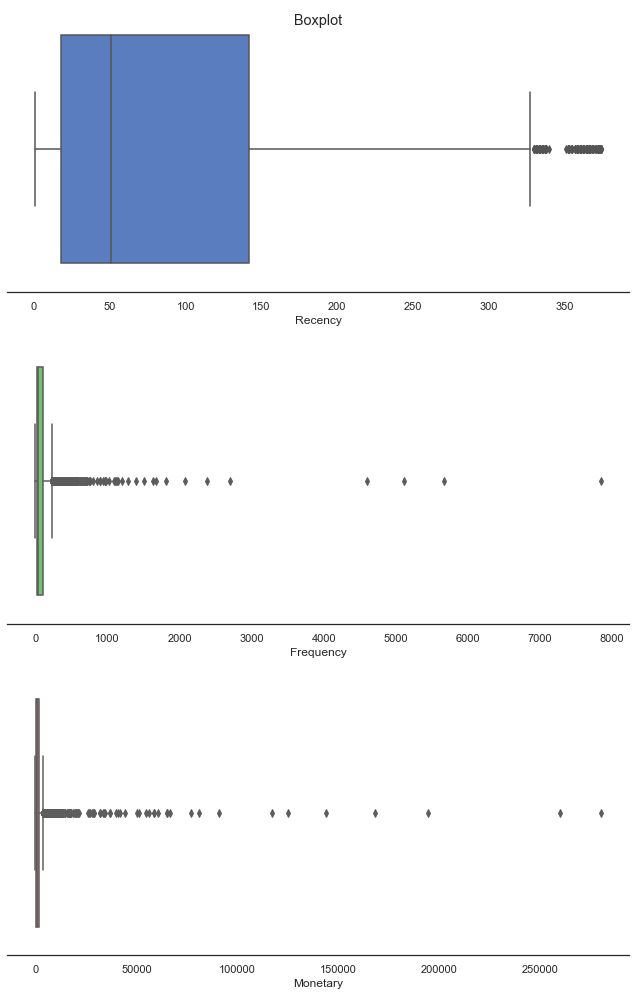

In [61]:
sns.set(style='white', palette='muted', color_codes=True)
fig, axs = plt.subplots(3, 1, figsize=(9, 14))
sns.despine(left=True)
axs[0] = sns.boxplot(df_cluster['Recency'], ax=axs[0])
axs[1] = sns.boxplot(df_cluster['Frequency'], ax=axs[1], color='g')
axs[2] = sns.boxplot(df_cluster['Monetary'], ax=axs[2], color='r')

fig.suptitle('Boxplot')
plt.setp(axs, yticks=[])
plt.tight_layout()
plt.show()

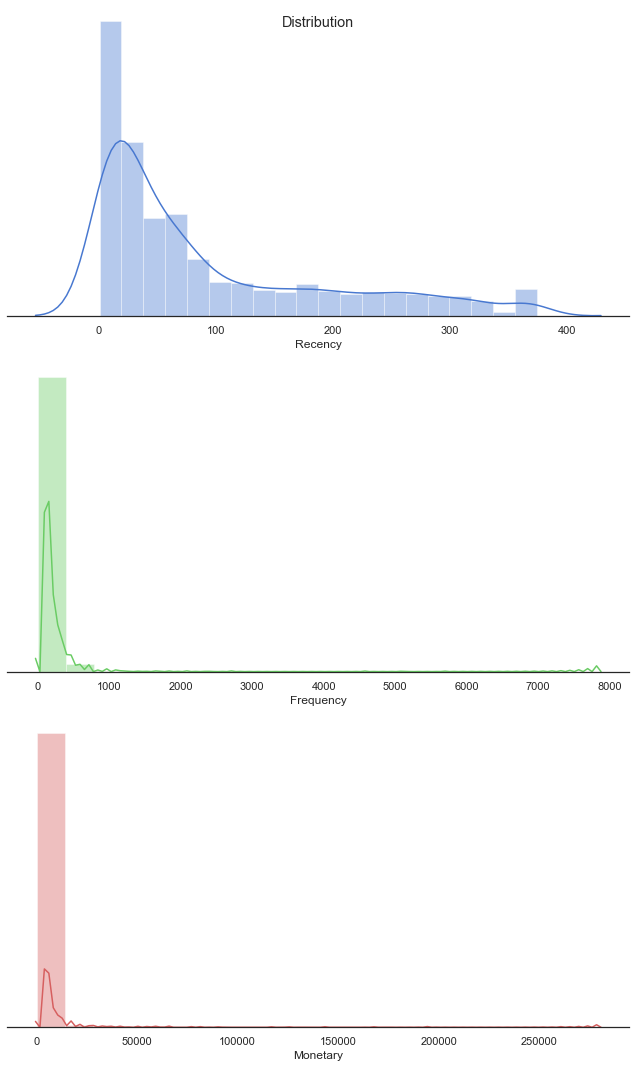

In [62]:
sns.set(style='white', palette='muted', color_codes=True)
fig, axs = plt.subplots(3, 1, figsize=(9, 15))
sns.despine(left=True)
axs[0] = sns.distplot(df_cluster['Recency'], bins=20, ax=axs[0])
axs[1] = sns.distplot(df_cluster['Frequency'], bins=20, ax=axs[1], color='g')
axs[2] = sns.distplot(df_cluster['Monetary'], bins=20, ax=axs[2], color='r')

fig.suptitle('Distribution')
plt.setp(axs, yticks=[])
plt.tight_layout()
plt.show()

The plots above shows outliers and positive skewedness in the data. So I will use logarithmic transformation to reduce the outliers and distribution skewness

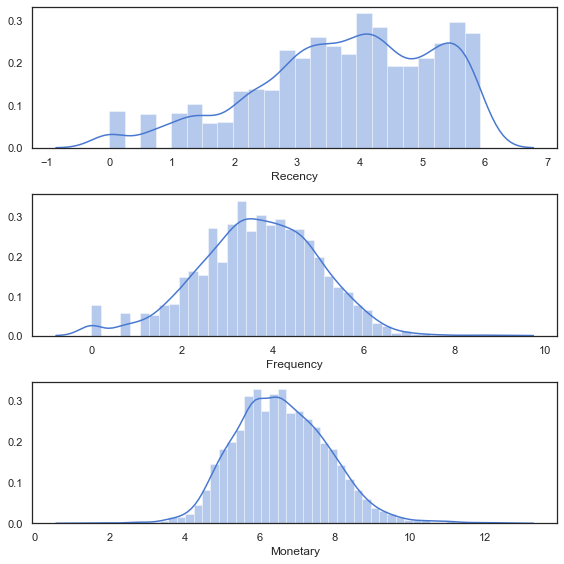

In [63]:
df_cluster_log = np.log(df_cluster[['Recency', 'Frequency','Monetary']])

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(df_cluster_log["Recency"], ax=ax1)
sns.distplot(df_cluster_log["Frequency"], ax=ax2)
sns.distplot(df_cluster_log["Monetary"], ax=ax3)
plt.tight_layout()

This has removed the skewedness from the distribution

In [64]:
#Fit and transform
df_cluster_log.head()

,Recency,Frequency,Monetary
0,5.786897,0.000000,11.253942
1,0.693147,5.204007,8.368693
2,4.317488,3.433987,7.494007
3,2.944439,4.290459,7.471676
4,5.736572,2.833213,5.812338


### 6. Model

In this section, I will apply the K-Means and Mean Shift algorithms to identify different clusters present in the data.

#### K - Means Clustering

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_cluster_log)

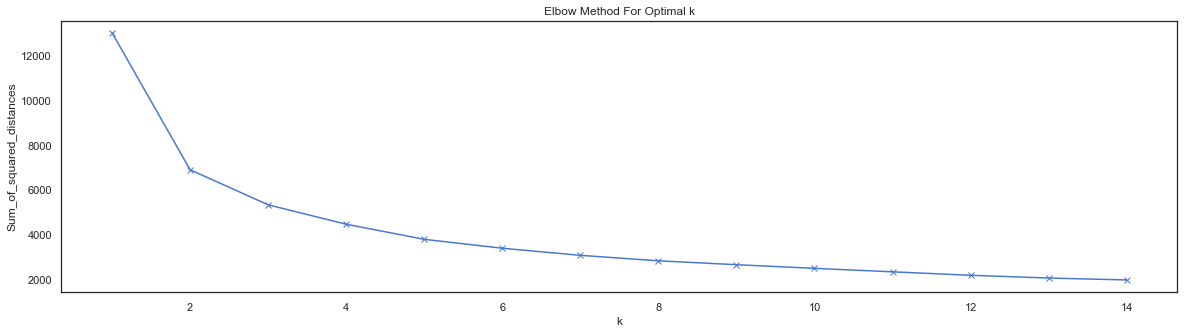

In [66]:
# importing kmeans library
from sklearn.cluster import KMeans

# Elbow method to determine optimal k clusters
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the figure above we can see that the most optimal value is 3. So we choose 3 as the k values of the k-means model.

K-Means


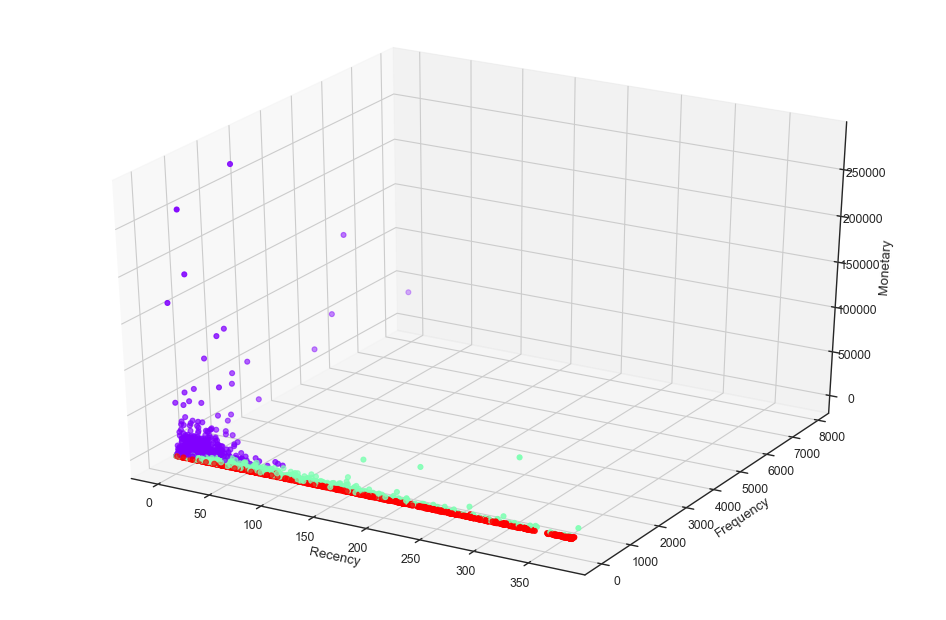

In [67]:
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=3)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['Recency'],df_cluster['Frequency'],df_cluster['Monetary'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)
print("K-Means")

In [68]:
df_clustered_kmeans = df_cluster.assign(Cluster=kmeans_labels)

In [69]:
km_clusters_amount = pd.DataFrame(df_clustered_kmeans.groupby(["Cluster"]).Monetary.mean())
km_clusters_frequency = pd.DataFrame(df_clustered_kmeans.groupby(["Cluster"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(df_clustered_kmeans.groupby(["Cluster"]).Recency.mean())

In [70]:
dfm = pd.concat([pd.Series([0,1,2]), km_clusters_recency, km_clusters_frequency, km_clusters_amount], axis=1)
dfm.columns = ["Cluster_No","Recency_mean", "Frequency_mean", "Monetary_mean"]
dfm.head()

,Cluster_No,Recency_mean,Frequency_mean,Monetary_mean
0,0,13.124095,261.550155,6512.838935
1,1,69.423637,66.022126,1169.489726
2,2,171.337286,14.905138,294.089717


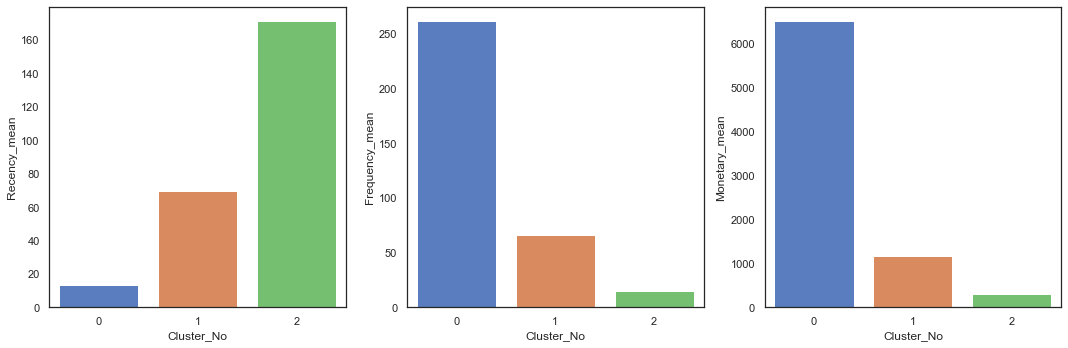

In [71]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x=dfm.Cluster_No, y=dfm.Recency_mean, ax = axs[0])
sns.barplot(x=dfm.Cluster_No, y=dfm.Frequency_mean, ax = axs[1])
sns.barplot(x=dfm.Cluster_No, y=dfm.Monetary_mean, ax = axs[2])
plt.tight_layout()            
plt.show()

In [72]:
grouped_kmeans = df_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,Recency,Frequency,Monetary
Cluster,,,
0,13.1,261.6,6512.8
1,69.4,66.0,1169.5
2,171.3,14.9,294.1


The table and barplot above shows centroids of each clusters that could determine the clusters rule.
These are:

- Cluster 0: Moderate Recency, Low Frequency, Low Monetary customers
- Cluster 1: Low Recency, Low Frequency, Low Monetary customers
- Cluster 2: High Recency, High Frequency, Very High Monetary customers

#### Mean Shift Algorithm

Mean shift K-Means
number of estimated clusters : 4
bandwidth : 1.5480575180771154


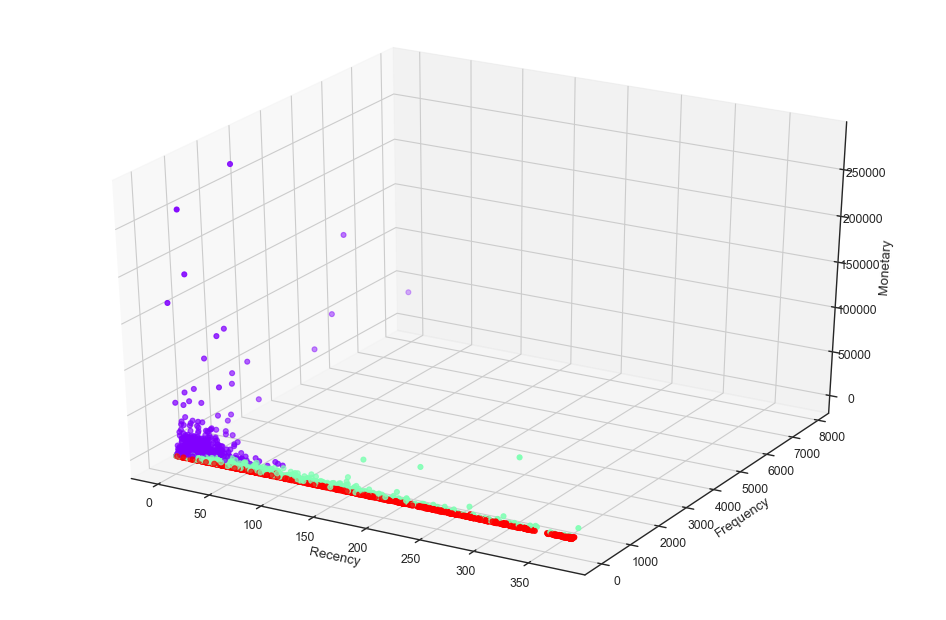

In [73]:
from sklearn.cluster import MeanShift, estimate_bandwidth


bandwidth=estimate_bandwidth(cluster_scaled, quantile=0.3)

analyzer = MeanShift(bandwidth=bandwidth) 
analyzer.fit(cluster_scaled)
labels = analyzer.labels_


fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['Recency'],df_cluster['Frequency'],df_cluster['Monetary'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)
print("Mean shift K-Means")  


labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# print the labels of each data 
print("number of estimated clusters : %d" % n_clusters_)
print("bandwidth :", bandwidth)

In [74]:
df_clustered_kmeans1 = df_cluster.assign(Cluster=labels)
grouped_kmeans_shift = df_clustered_kmeans1.groupby(['Cluster']).mean().round(1)
print(grouped_kmeans_shift)

         Recency  Frequency  Monetary
Cluster                              
0           93.7       86.7    1467.6
1          175.8       98.3   39088.2
2           13.3       10.6    1934.3
3            2.6      770.6   61930.9


The table above shows centroids of each clusters that could determine the clusters rule.
These are:

- Cluster 0: Low Recency, Low Frequency, Low Monetary customers
- Cluster 1: Low Recency, Low Frequency, High Monetary customers
- Cluster 2: High Recency, Very Low Frequency, Low Monetary customers
- Cluster 3: Very High Recency, High Frequency, Very High Monetary customers